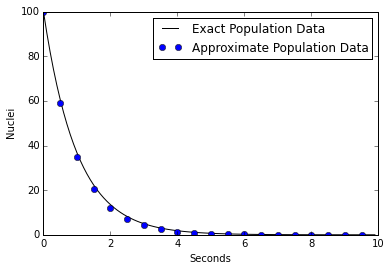

In [3]:
#Imports
%matplotlib inline
from math import exp
import pylab as plt
import numpy as np


#Functions
def finalPopulation(iPop,decay,fTime):
    """This gives the exact value of the population given an initial population, decay constant, and final time"""
    fPop=iPop*exp(-decay*fTime)
    return fPop

def numericalPopulation(nNaught,decay,fTime):
    """This gives a Taylor series approximation of the population given and initial population, decay constant, and final time"""
    fPop=nNaught*(1-decay*fTime)
    return fPop

#Variable Declarations/Initializations
decay=1 #a constant decay constant
recursPop=iPop=cApprox=100 # a constant initial population and recursion population
numPoints=100 #user defined number of points
cTime=0 #initializing current time
time=[] #used to pass values into exact
Nexact=[] #nuclei exactly
Napprox=[] #nuclei approximately
timeTotal=10 #Sets the length of time the model will occupy


for i in range(numPoints):
    """This loop creates the lists and iterates the function, including callbacks to previous items in order to do exponential decay"""
    time.append(cTime)
    
    Nexact.append(finalPopulation(iPop,decay,time[i])) #Generates the exact model data
    
    Napprox.append(cApprox)
    
    cApprox=numericalPopulation(recursPop,decay,timeTotal/numPoints) #generates numerical approximation data

    recursPop=cApprox #Assigns new population as the old population for next iteration
    
    cTime+=timeTotal/numPoints #Note, because of this method, time span is only over a single second, but in N tiny steps

#Plot commands
plt.plot(time,Nexact,"k-",label="Exact Population Data")
plt.plot(time,Napprox,"bo",label="Approximate Population Data",markevery=5)
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

The data shown above is of the decay of a single type of nuclei with a defined decay rate and initial population. From the data, we can see that the numerical approximation (the blue dots) fits the expected model of exponential decay. This model is the one used for estimations and calculations for nuclear decay, so it makes sense that this is the model that most closely fits. It is also a very good fit.

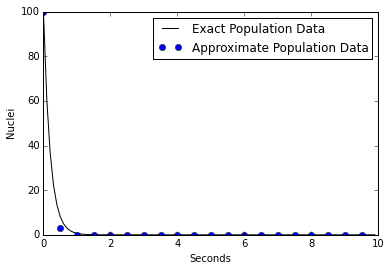

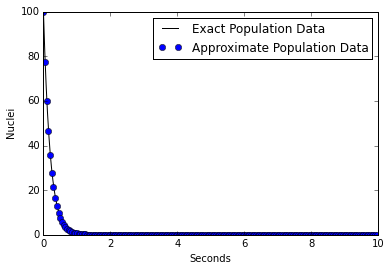

In [5]:
#Variable Declarations/Initializations
decay=5 #a constant decay constant
recursPop=iPop=cApprox=100 # a constant initial population and recursion population
numPoints=100 #user defined number of points
cTime=0 #initializing current time
time=[] #used to pass values into exact
Nexact=[] #nuclei exactly
Napprox=[] #nuclei approximately
timeTotal=10 #Sets the length of time the model will occupy


for i in range(numPoints):
    """This loop creates the lists and iterates the function, including callbacks to previous items in order to do exponential decay"""
    time.append(cTime)
    
    Nexact.append(finalPopulation(iPop,decay,time[i])) #Generates the exact model data
    
    Napprox.append(cApprox)
    
    cApprox=numericalPopulation(recursPop,decay,timeTotal/numPoints) #generates numerical approximation data

    recursPop=cApprox #Assigns new population as the old population for next iteration
    
    cTime+=timeTotal/numPoints #Note, because of this method, time span is only over a single second, but in N tiny steps

#Plot commands
plt.plot(time,Nexact,"k-",label="Exact Population Data")
plt.plot(time,Napprox,"bo",label="Approximate Population Data",markevery=5)
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

#Variable Declarations/Initializations
decay=5 #a constant decay constant
recursPop=iPop=cApprox=100 # a constant initial population and recursion population
numPoints=1000 #user defined number of points
cTime=0 #initializing current time
time=[] #used to pass values into exact
Nexact=[] #nuclei exactly
Napprox=[] #nuclei approximately
timeTotal=10 #Sets the length of time the model will occupy


for i in range(numPoints):
    """This loop creates the lists and iterates the function, including callbacks to previous items in order to do exponential decay"""
    time.append(cTime)
    
    Nexact.append(finalPopulation(iPop,decay,time[i])) #Generates the exact model data
    
    Napprox.append(cApprox)
    
    cApprox=numericalPopulation(recursPop,decay,timeTotal/numPoints) #generates numerical approximation data

    recursPop=cApprox #Assigns new population as the old population for next iteration
    
    cTime+=timeTotal/numPoints #Note, because of this method, time span is only over a single second, but in N tiny steps

#Plot commands
plt.plot(time,Nexact,"k-",label="Exact Population Data")
plt.plot(time,Napprox,"bo",label="Approximate Population Data",markevery=5)
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

Here is an example of a poor fit over the same span of time. By cranking up the decay factor, the graph goes straight towards zero, completely neglecting the early components. If the steps were increased, it would yield a closer fit, as demonstrated in the second image. However, it is still a poor model in terms of actual usability, since the leftmost part 

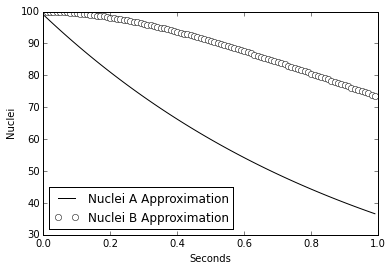

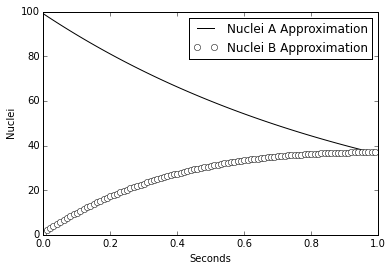

In [13]:
#Function Definitions
def nucleiApproxA(lamA,aPop,deltaT):
    """Approximates the amount of Nuclei A"""
    fPop=aPop-aPop*lamA*deltaT
    return fPop

def nucleiApproxB(lamA,lamB,aPop,bPop,deltaT):
    """Approximates the amount of Nuclei B"""
    fPop=bPop+deltaT*lamA*aPop-deltaT*lamB*bPop
    return fPop


#Variable Declarations/Initializations
decayA=1 #decay value of A
decayB=1 #decay value of B
cPopA=100 #starting number of A
cPopB=100 #starting number of A
numPoints=100 #user defined number of points

APop=[]
BPop=[]
time=[]

for i in range(numPoints):
    time.append(i/numPoints)
    if i==0: #Special case for starting the loop, since Python (by default) lacks a "do-while" loop
        APop.append(nucleiApproxA(decayA,cPopA,1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,cPopA,cPopB,1/numPoints))
    else:
        APop.append(nucleiApproxA(decayA,APop[i-1],1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,APop[i-1],BPop[i-1],1/numPoints))
    
#Plot commands
plt.plot(time,APop,"k-",label="Nuclei A Approximation")
plt.plot(time,BPop,"wo",label="Nuclei B Approximation")
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

#Variable Declarations/Initializations
decayA=1 #decay value of A
decayB=1 #decay value of B
cPopA=100 #starting number of A
cPopB=0 #starting number of A
numPoints=100 #user defined number of points

APop=[]
BPop=[]
time=[]

for i in range(numPoints):
    time.append(i/numPoints)
    if i==0: #Special case for starting the loop, since Python (by default) lacks a "do-while" loop
        APop.append(nucleiApproxA(decayA,cPopA,1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,cPopA,cPopB,1/numPoints))
    else:
        APop.append(nucleiApproxA(decayA,APop[i-1],1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,APop[i-1],BPop[i-1],1/numPoints))
    
#Plot commands
plt.plot(time,APop,"k-",label="Nuclei A Approximation")
plt.plot(time,BPop,"wo",label="Nuclei B Approximation")
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

The model above maps two different types of nuclei; A and B. Both have defined decay constants, and initial populations, but B is also created as a result of A decaying. In the data, we can see that nuclei A clearly demonstrates the same exponential decay behaviour that Part 1 yielded. Nuclei B is harder to determing, but if the initial population of A is set to zero, then the pure exponential decay function can be observed in B, thus proving it is also undergoing exponential decay. Further, if one were to construct a graph of B's natural decay, along with the production of A, the sum of the two lines would result in Nuclei B's curve.

The second model shows what happens when the second population starts at 0, clearly illustrating its proportional growth compared to A.